<a href="https://colab.research.google.com/github/pranavinemalikanti/BayesLabAssignments/blob/main/Copy_of_MLConcepts_Day2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### --- Setup and Libraries ---

In [ ]:
!pip install numpy pandas matplotlib seaborn scikit-learn ipywidgets --quiet

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from ipywidgets import interact, widgets

# Ensure visuals are inline
%matplotlib inline


# Section 1: Introduction to Logistic Regression


#### **What is Logistic Regression?**
---


##### Imagine This:

You're trying to predict if a student will pass an exam. The answer is either **Yes (1)** or **No (0)**. You can't draw a straight line like in Linear Regression because the output is not continuous—it's a yes or no.

That's where **Logistic Regression** comes in. It's used for **classification** problems.



##### Key Idea:
Instead of predicting a number, Logistic Regression predicts a **probability**. This probability is then converted into a class (0 or 1).

- **Probability > 0.5?** Predict 1 (Yes)
- **Probability ≤ 0.5?** Predict 0 (No)



##### The Sigmoid Function
This is the magic formula that converts numbers into probabilities:

$$
Σ(Z) = \frac{1}{1 + e^{-z}}
$$


Where:
- $$
  z = w ⋅ x + b
  $$
  (like the line equation in linear regression)
  
- 𝙚 is Euler's number (about 2.718)

- Σ(z) outputs values between 0 and 1 (probabilities!)


# Section 2: Visualizing the Sigmoid Function

In [2]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

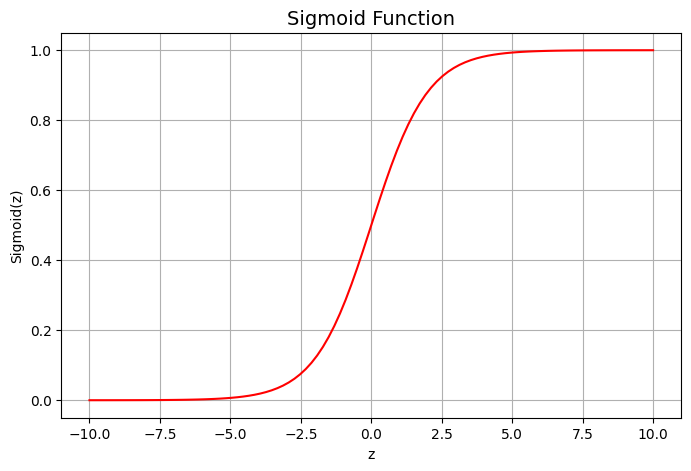

In [3]:
# Plotting the Sigmoid Curve
z = np.linspace(-10, 10, 100)
s = sigmoid(z)

plt.figure(figsize=(8, 5))
plt.plot(z, s, color='red')
plt.title('Sigmoid Function', fontsize=14)
plt.xlabel('z')
plt.ylabel('Sigmoid(z)')
plt.grid()
plt.show()

In [4]:
# --- Interactive Visualization ---
def interactive_sigmoid(weight=1.0, bias=0.0):
    z = np.linspace(-10, 10, 100)
    s = sigmoid(weight * z + bias)
    plt.figure(figsize=(8, 5))
    plt.plot(z, s, color='blue')
    plt.title(f'Sigmoid Function (Weight={weight}, Bias={bias})')
    plt.xlabel('z')
    plt.ylabel('Sigmoid(z)')
    plt.grid()
    plt.show()

interact(interactive_sigmoid, weight=(-5.0, 5.0, 0.1), bias=(-5.0, 5.0, 0.1))

interactive(children=(FloatSlider(value=1.0, description='weight', max=5.0, min=-5.0), FloatSlider(value=0.0, …

<function __main__.interactive_sigmoid(weight=1.0, bias=0.0)>

# Section 3: Binary Classification with Logistic Regression

#### **Example: Predicting if a Student Passes**

- **Features (X):** Hours Studied
- **Target (y):** Pass (1) or Fail (0)

Let's create a simple dataset.

In [5]:
# Sample Data
np.random.seed(0)
hours = np.random.randint(1, 10, 20)
pass_fail = (hours + np.random.randn(20) > 5).astype(int)

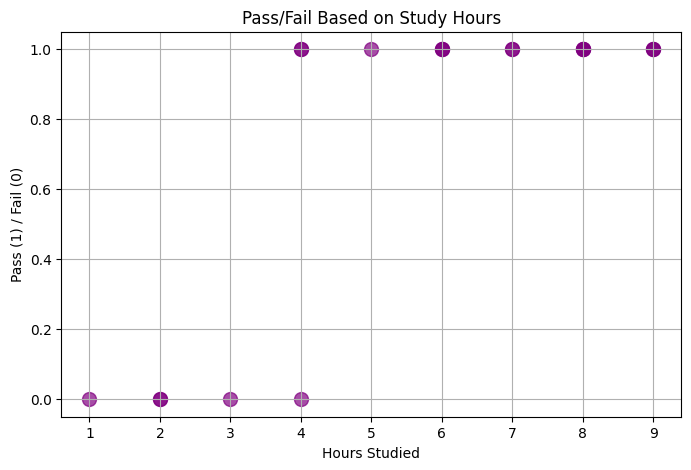

In [6]:
# Data Visualization
plt.figure(figsize=(8, 5))
plt.scatter(hours, pass_fail, color='purple', s=100, alpha=0.7)
plt.xlabel('Hours Studied')
plt.ylabel('Pass (1) / Fail (0)')
plt.title('Pass/Fail Based on Study Hours')
plt.grid()
plt.show()

In [7]:
# Model Training
X = hours.reshape(-1, 1)
y = pass_fail

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

In [8]:
# Predictions
y_pred = log_reg.predict(X)

In [9]:
# Evaluation
print("Accuracy:", accuracy_score(y, y_pred))
print("\nClassification Report:\n", classification_report(y, y_pred))

Accuracy: 0.95

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.94      1.00      0.97        15

    accuracy                           0.95        20
   macro avg       0.97      0.90      0.93        20
weighted avg       0.95      0.95      0.95        20



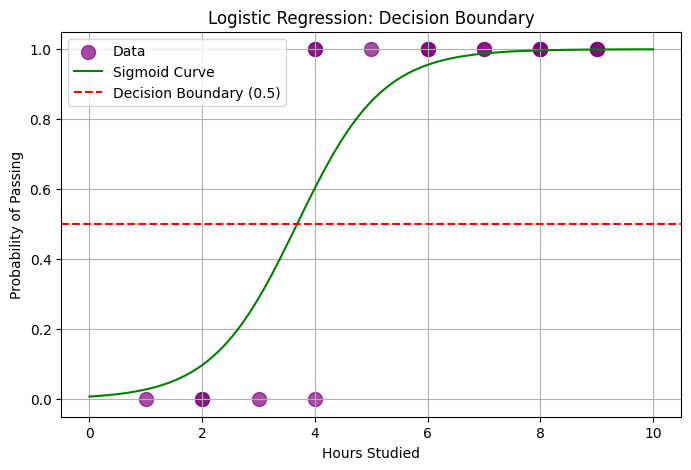

In [10]:
# Decision Boundary Visualization
x_range = np.linspace(0, 10, 100).reshape(-1, 1)
probabilities = log_reg.predict_proba(x_range)[:, 1]

plt.figure(figsize=(8, 5))
plt.scatter(hours, pass_fail, color='purple', s=100, alpha=0.7, label='Data')
plt.plot(x_range, probabilities, color='green', label='Sigmoid Curve')
plt.axhline(0.5, color='red', linestyle='--', label='Decision Boundary (0.5)')
plt.xlabel('Hours Studied')
plt.ylabel('Probability of Passing')
plt.title('Logistic Regression: Decision Boundary')
plt.legend()
plt.grid()
plt.show()

# Section 4: Multiclass Classification with Logistic Regression


#### **Example: Classifying Iris Flowers**
We'll classify Iris flowers into three species:
- Setosa
- Versicolor
- Virginica


In [11]:
# Load Iris Dataset
iris = load_iris()
X_iris = iris.data[:, :2]  # Using two features for visualization
y_iris = iris.target

In [12]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, test_size=0.2, random_state=42)

In [13]:
# Model Training
log_reg_multi = LogisticRegression(multi_class='ovr')
log_reg_multi.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='ovr')

In [97]:
# Predictions
y_pred_multi = log_reg_multi.predict(X_test)
print(y_pred_multi)

[1 0 2 1 2 0 1 2 1 1 2 0 0 0 0 2 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [15]:
# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_multi))
print("\nClassification Report:\n", classification_report(y_test, y_pred_multi))


Accuracy: 0.9333333333333333

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.78      0.88         9
           2       0.85      1.00      0.92        11

    accuracy                           0.93        30
   macro avg       0.95      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



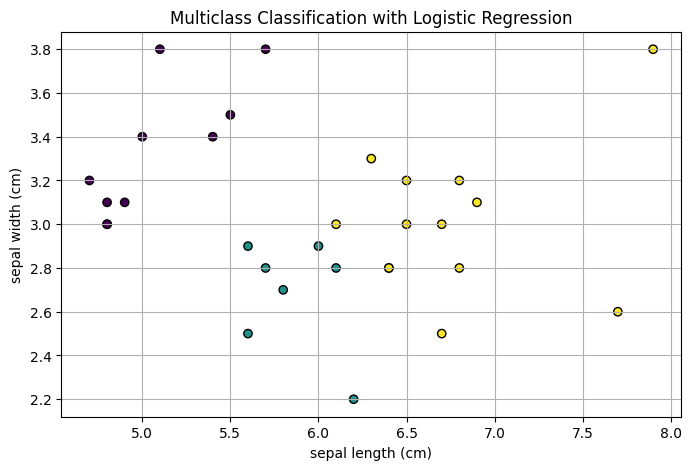

In [16]:
# Visualization
plt.figure(figsize=(8, 5))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_multi, cmap='viridis', edgecolors='k')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('Multiclass Classification with Logistic Regression')
plt.grid()
plt.show()

## **Section 5: Assignments**

### Beginner Assignment: Predicting Pass/Fail Based on Study Hours

Task:
- Use Logistic Regression to predict if a student will pass based on study hours.
- Visualize the data and decision boundary.
- Using real world data from kaggle

**Hint:** Use a kaggle dataset and modify the code.

In [29]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mrsimple07/student-exam-performance-prediction")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/mrsimple07/student-exam-performance-prediction/versions/2


In [30]:
import os

# Check files inside the downloaded dataset folder
print("Files in dataset folder:", os.listdir(path))

Files in dataset folder: ['student_exam_data_new.csv', 'student_exam_data.csv']


In [37]:
csv_file_path = os.path.join(path, "student_exam_data_new.csv")  # Replace with the actual file name
df = pd.read_csv(csv_file_path)
print(df.head())  # Display first few rows

   Study Hours  Previous Exam Score  Pass/Fail
0     4.370861            81.889703          0
1     9.556429            72.165782          1
2     7.587945            58.571657          0
3     6.387926            88.827701          1
4     2.404168            81.083870          0


In [43]:
#remove Previous Exam Score column
df.drop(columns = ["Previous Exam Score"], inplace = True)
print(df.head())

   Study Hours  Pass/Fail
0     4.370861          0
1     9.556429          1
2     7.587945          0
3     6.387926          1
4     2.404168          0


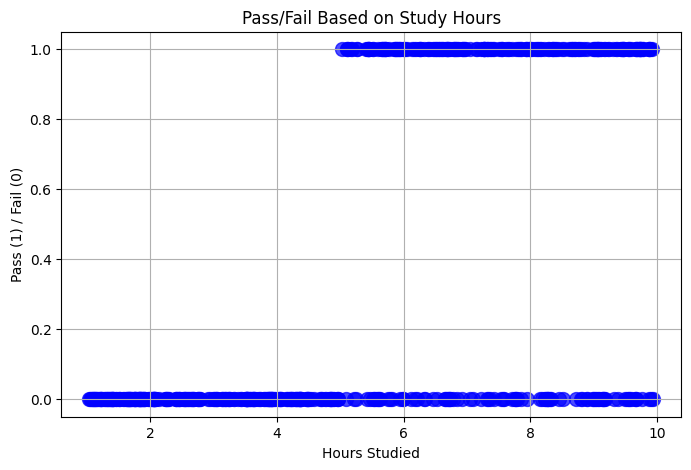

In [46]:
# Data Visualization
plt.figure(figsize=(8, 5))
plt.scatter(df['Study Hours'], df['Pass/Fail'], color='blue', s=100, alpha=0.7)
plt.xlabel('Hours Studied')
plt.ylabel('Pass (1) / Fail (0)')
plt.title('Pass/Fail Based on Study Hours')
plt.grid()
plt.show()

In [51]:
# Model Training
X = df.drop(columns=['Study Hours'])
y = df['Pass/Fail']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [52]:
model = LogisticRegression()

In [53]:
model.fit(X_train, y_train)

LogisticRegression()

In [56]:
y_pred = model.predict(X_test)

In [58]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        63
           1       1.00      1.00      1.00        37

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


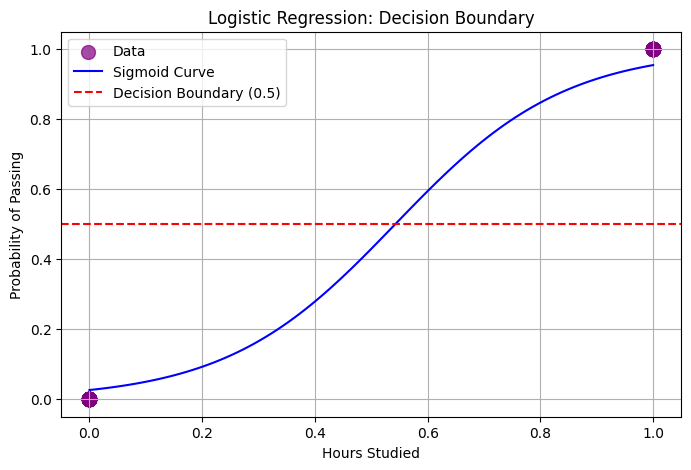

In [69]:
# Decision Boundary Visualization

# Generate smooth X values over the study hours range
X_range = np.linspace(X_test.min(), X_test.max(), 100).reshape(-1, 1)
# Predict probabilities for these X values
y_prob_range = model.predict_proba(X_range)[:, 1]

plt.figure(figsize=(8, 5))
plt.scatter(X_test, y_test, color='purple', s=100, alpha=0.7, label='Data')
plt.plot( X_range, y_prob_range, color='blue', label='Sigmoid Curve')
plt.axhline(0.5, color='red', linestyle='--', label='Decision Boundary (0.5)')
plt.xlabel('Hours Studied')
plt.ylabel('Probability of Passing')
plt.title('Logistic Regression: Decision Boundary')
plt.legend()
plt.grid()
plt.show()

### Advanced Assignment: Classifying Flowers

Task:
- Use the Iris dataset from kaggle.
- Train Logistic Regression for multiclass classification.
- Visualize the classification results with decision boundaries.

**Hint:** Experiment with different features and observe how performance changes.


In [70]:
path = kagglehub.dataset_download("himanshunakrani/iris-dataset")
print("Path to dataset files:", path)

100%|██████████| 0.98k/0.98k [00:00<00:00, 1.30MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/himanshunakrani/iris-dataset/versions/1


In [71]:
print(os.listdir(path))

['iris.csv']


In [75]:
csv_file_path = os.path.join(path, "iris.csv")  # Replace with the actual file name
df = pd.read_csv(csv_file_path)
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [88]:
X_iris = df.drop(columns=['species', 'petal_length', 'petal_width'])
y_iris = df['species']
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, test_size=0.2, random_state=42)

In [90]:
model = LogisticRegression(multi_class='ovr')
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='ovr')

In [91]:
y_pred = model.predict(X_test)

In [92]:
print("Accuracy:",accuracy_score(y_test, y_pred))
print("Classification report\n",classification_report(y_test, y_pred))

Accuracy: 0.9333333333333333
Classification report
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.78      0.88         9
   virginica       0.85      1.00      0.92        11

    accuracy                           0.93        30
   macro avg       0.95      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



In [104]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_numeric = label_encoder.fit_transform(y_iris)  # Convert 'setosa', 'versicolor', etc. → 0, 1, 2

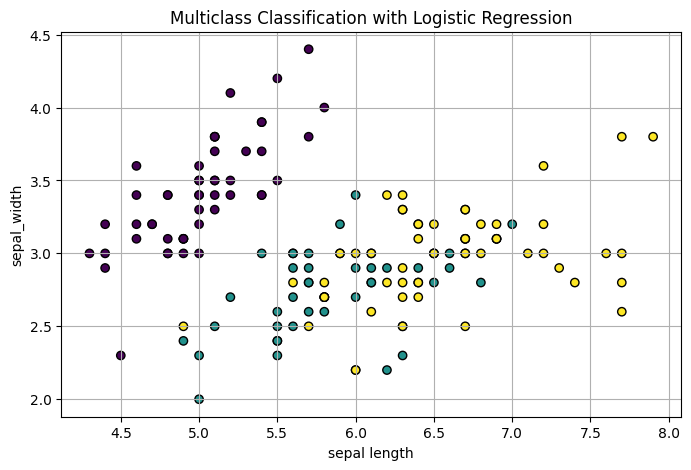

In [105]:
# Visualization
plt.figure(figsize=(8, 5))
plt.scatter(df['sepal_length'], df['sepal_width'], c=y_numeric, cmap='viridis', edgecolors='k')
plt.xlabel('sepal length')
plt.ylabel('sepal_width')
plt.title('Multiclass Classification with Logistic Regression')
plt.grid()
plt.show()

## **References**



*   https://youtu.be/T5AoqxQFkzY?si=AeKiKwcwxm506VJz
*   https://www.youtube.com/watch?v=nk2CQITm_eo
*   https://www.youtube.com/watch?v=yIYKR4sgzI8
*   Machine Learning from Andrew Ng on Coursera

